# Explore $a_{\rm dg}$

In [18]:
# imports
import os
from importlib import reload
import numpy as np

from scipy.io import matlab

import seaborn as sns
from matplotlib import pyplot as plt

from matplotlib.ticker import MultipleLocator 
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.crs as ccrs
import cartopy

from ocpy.hydrolight import loisel23
from ocpy.utils import plotting

from bing import rt
from bing.priors import adg 

In [2]:
%matplotlib ipympl

In [9]:
tformM = ccrs.Mollweide()
tformP = ccrs.PlateCarree()  

# Load up Kehrli+2024

In [3]:
ag_dict, ad_dict = adg.load_kehrli2024()
ag_dict.keys()

dict_keys(['wave', 'date', 'lat', 'lon', 'spec'])

# Isolate 440

In [5]:
ag_i440 = np.argmin(np.abs(ag_dict['wave']-440.))
ad_i440 = np.argmin(np.abs(ad_dict['wave']-440.))

In [7]:
ag_440 = ag_dict['spec'][:,ag_i440]
ad_440 = ad_dict['spec'][:,ad_i440]

# Histograms

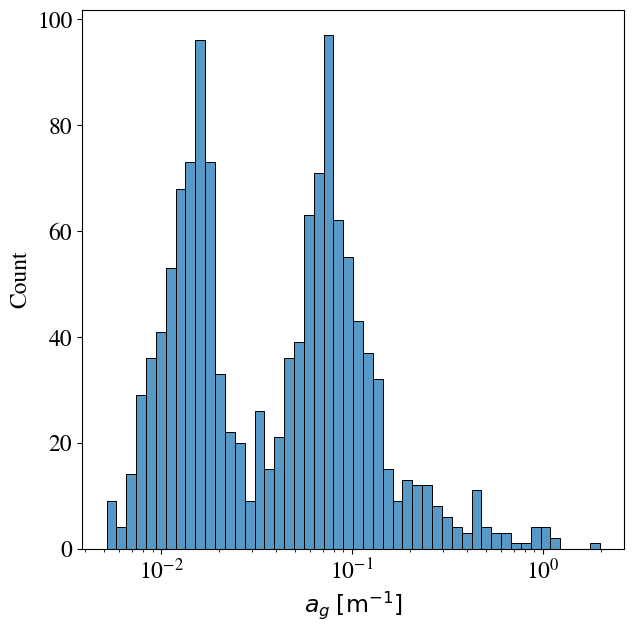

In [20]:
fig = plt.figure(figsize=(7,7))
ax = plt.gca()

sns.histplot(ag_440, bins=50, log_scale=True, ax=ax)
ax.set_xlabel(r'$a_g \; \rm [m^{-1}]$')

plotting.set_fontsize(ax, 17)

plt.show()

# Geo time

## $a_g$

/home/xavier/miniconda3/envs/os_11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/home/xavier/miniconda3/envs/os_11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:475: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '
/home/xavier/miniconda3/envs/os_11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


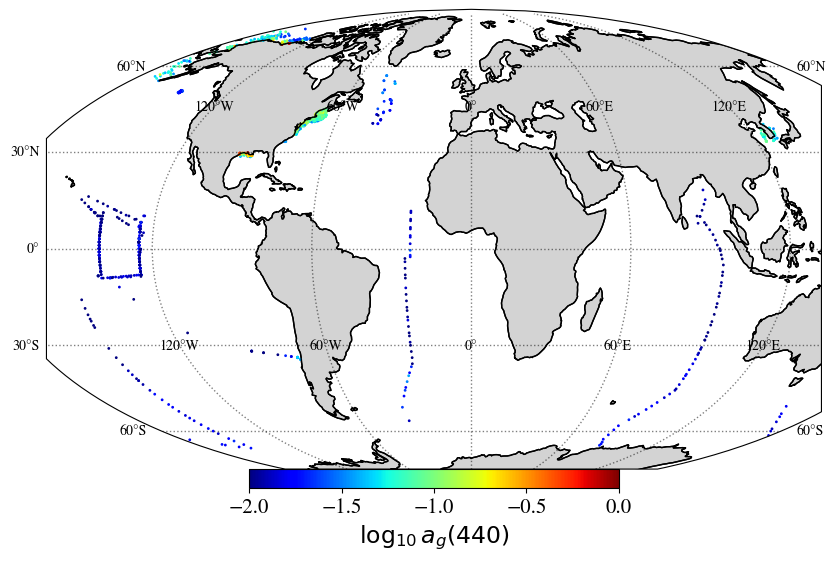

In [29]:
# Start the figure
fig = plt.figure(figsize=(10,8))
plt.clf()
ax = plt.subplot(projection=tformM)

cmap = 'jet'
img = plt.scatter(x=ag_dict['lon'],
        y=ag_dict['lat'], 
                  c=np.log10(ag_440), cmap=cmap,
                vmin=-2.,
                vmax=0., 
            s=1,
            transform=tformP)#, label=f'Line {line}')

# Coast lines
ax.coastlines(zorder=10)
ax.add_feature(cartopy.feature.LAND, 
            facecolor='lightgray', edgecolor='black')
        #ax.set_global()

gl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=1, 
    color='black', alpha=0.5, linestyle=':', draw_labels=True)
gl.xlabels_top = False
gl.ylabels_left = True
gl.ylabels_right=False
gl.xlines = True
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'color': 'black'}# 'weight': 'bold'}
gl.ylabel_style = {'color': 'black'}# 'weight': 'bold'}

# Define cities
cities = [
    ('Los Angeles', -118.2437, 34.0522),
    ('San Francisco', -122.4194, 37.7749),
    ('Santa Barbara', -119.6982, 34.4208),
    ('San Diego', -117.1611, 32.7157),
    ('Santa Cruz', -122.0308, 36.9741),
    #('Sacramento', -121.4944, 38.5816)
]

cbaxes = plt.colorbar(img, pad=0., fraction=0.030, orientation='horizontal') #location='left')
cbaxes.set_label(r'$\log_{10} a_g(440)$', fontsize=17.)
cbaxes.ax.tick_params(labelsize=15)

# Label the axes
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

plt.show()

## $a_d$

/home/xavier/miniconda3/envs/os_11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/home/xavier/miniconda3/envs/os_11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:475: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '
/home/xavier/miniconda3/envs/os_11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


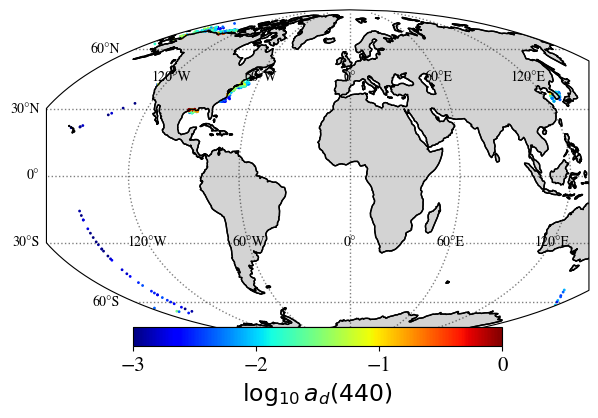

In [28]:

# Start the figure
fig = plt.figure(figsize=(7,8))
plt.clf()
ax = plt.subplot(projection=tformM)

cmap = 'jet'
img = plt.scatter(x=ad_dict['lon'],
        y=ad_dict['lat'], 
                  c=np.log10(ad_440), cmap=cmap,
                vmin=-3.,
                vmax=0., 
            s=1,
            transform=tformP)#, label=f'Line {line}')

# Coast lines
ax.coastlines(zorder=10)
ax.add_feature(cartopy.feature.LAND, 
            facecolor='lightgray', edgecolor='black')
        #ax.set_global()

gl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=1, 
    color='black', alpha=0.5, linestyle=':', draw_labels=True)
gl.xlabels_top = False
gl.ylabels_left = True
gl.ylabels_right=False
gl.xlines = True
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'color': 'black'}# 'weight': 'bold'}
gl.ylabel_style = {'color': 'black'}# 'weight': 'bold'}

# Define cities
cities = [
    ('Los Angeles', -118.2437, 34.0522),
    ('San Francisco', -122.4194, 37.7749),
    ('Santa Barbara', -119.6982, 34.4208),
    ('San Diego', -117.1611, 32.7157),
    ('Santa Cruz', -122.0308, 36.9741),
    #('Sacramento', -121.4944, 38.5816)
]

cbaxes = plt.colorbar(img, pad=0., fraction=0.030, orientation='horizontal') #location='left')
cbaxes.set_label(r'$\log_{10} a_d(440)$', fontsize=17.)
cbaxes.ax.tick_params(labelsize=15)

# Label the axes
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

plt.show()